# Vehicle Price Prediction with Gradient Boosting (XGBoost)
This notebook trains and evaluates a vehicle price prediction model using XGBoost

In [1]:
# Step 1: Install XGBoost
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 1.8/72.0 MB 17.3 MB/s eta 0:00:05
   --- ------------------------------------ 6.8/72.0 MB 22.3 MB/s eta 0:00:03
   ----- ---------------------------------- 9.4/72.0 MB 17.7 MB/s eta 0:00:04
   -------- ------------------------------- 14.4/72.0 MB 19.2 MB/s eta 0:00:03
   ------------ --------------------------- 22.5/72.0 MB 23.7 MB/s eta 0:00:03
   --------------- ------------------------ 28.0/72.0 MB 24.3 MB/s eta 0:00:02
   -------------------- ------------------- 36.2/72.0 MB 26.1 MB/s eta 0:00:02
   ------------------------ --------------- 44.3/72.0 MB 27.9 MB/s eta 0:00:01
   ---------------------------- ----------- 51.1/72.0 MB 28.4 MB/s eta 0:00:01
   -------------------------------- ------- 57.7/72.0 MB 28.9 MB/s eta 0:00:01
   ------------------------------------ --- 65.0/72.0 MB 29.4 MB/

In [24]:
# Step 2: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
import os
import joblib

In [25]:
# Step 3: Load and Prepare Data
data = pd.read_csv("../data/final_output.csv")
X = data.drop(columns=['selling_price'])
y = data['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Step 4: Train XGBoost Model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [27]:
# Step 5: Evaluate Model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("XGBoost Model Results:")
print("R²:", r2)
print("RMSE:", rmse)

XGBoost Model Results:
R²: 0.49031723953565853
RMSE: 172584.48571433


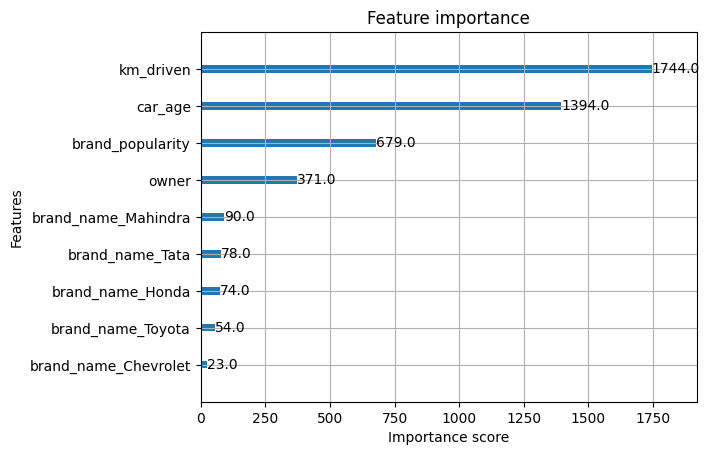

In [28]:
# Step 6: Feature Importance Visualization
xgb.plot_importance(model)
plt.show()

In [29]:
# Step 7: Save the Visualization
output_dir_visualization = '../results/eda_visualizations/IT24103038_XGBoost/'
os.makedirs(output_dir_visualization, exist_ok=True)

xgb.plot_importance(model)
plt.savefig(os.path.join(output_dir_visualization, 'fi_baseline.png'))
plt.close()

print(f"Feature importance visualization saved to {os.path.join(output_dir_visualization, 'fi_baseline.png')}")

Feature importance visualization saved to ../results/eda_visualizations/IT24103038_XGBoost/fi_baseline.png


In [30]:
# Step 8: Save the Baseline Model
output_dir = '../results/outputs/IT24103038_XGBoost/'
os.makedirs(output_dir, exist_ok=True)

model_path = os.path.join(output_dir, 'xgboost_baseline_model.joblib')
joblib.dump(model, model_path)

print(f"Baseline model saved to {model_path}")

Baseline model saved to ../results/outputs/IT24103038_XGBoost/xgboost_baseline_model.joblib


## Model Variation 1: Increase Number of Estimators
This variation trains an XGBoost regressor with n_estimators=200 to evaluate the effect of more trees on model performance.

In [31]:
# Train Model Variation 1
model_var1 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, random_state=42)
model_var1.fit(X_train, y_train)
y_pred_var1 = model_var1.predict(X_test)

print("Variation 1 - n_estimators=200")
print("R²:", r2_score(y_test, y_pred_var1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_var1)))

Variation 1 - n_estimators=200
R²: 0.4496171554076952
RMSE: 179342.91518595334


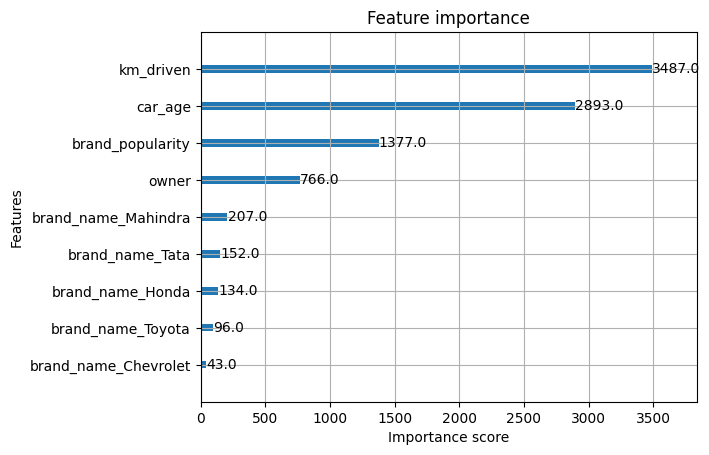

In [32]:
# Feature Importance Visualization for Variation 1
xgb.plot_importance(model_var1)
plt.show()

In [33]:
# Save the Visualization for Variation 1
xgb.plot_importance(model_var1)
plt.savefig(os.path.join(output_dir_visualization, 'fi_var1.png'))
plt.close()

print(f"Feature importance visualization saved to {os.path.join(output_dir_visualization, 'fi_var1.png')}")

Feature importance visualization saved to ../results/eda_visualizations/IT24103038_XGBoost/fi_var1.png


In [34]:
# Save Model Variation 1
model_path = os.path.join(output_dir, 'xgboost_var1_model.joblib')
joblib.dump(model_var1, model_path)
print(f"Variation 1 model saved to {model_path}")

Variation 1 model saved to ../results/outputs/IT24103038_XGBoost/xgboost_var1_model.joblib


## Model Variation 2: Change Max Depth and Learning Rate
This variation trains an XGBoost regressor with max_depth=8 and learning_rate=0.05 to evaluate the effect of deeper trees and a lower learning rate on model performance.

In [35]:
# Train Model Variation 2
model_var2 = xgb.XGBRegressor(objective='reg:squarederror', max_depth=8, learning_rate=0.05, random_state=42)
model_var2.fit(X_train, y_train)
y_pred_var2 = model_var2.predict(X_test)

print("Variation 2 - max_depth=8, learning_rate=0.05")
print("R²:", r2_score(y_test, y_pred_var2))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_var2)))

Variation 2 - max_depth=8, learning_rate=0.05
R²: 0.5348483280776073
RMSE: 164872.82286447246


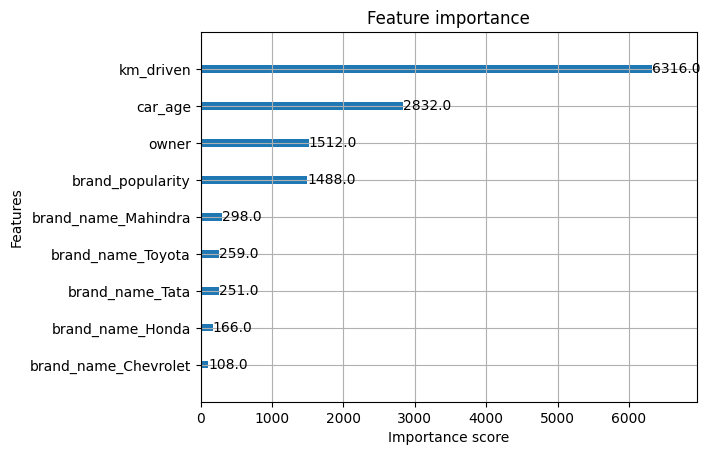

In [36]:
# Feature Importance Visualization for Variation 2
xgb.plot_importance(model_var2)
plt.show()

In [37]:
# Save the Visualization for Variation 2
xgb.plot_importance(model_var2)
plt.savefig(os.path.join(output_dir_visualization, 'fi_var2.png'))
plt.close()

print(f"Feature importance visualization saved to {os.path.join(output_dir_visualization, 'fi_var2.png')}")

Feature importance visualization saved to ../results/eda_visualizations/IT24103038_XGBoost/fi_var2.png


In [38]:
# Save Model Variation 2
model_path = os.path.join(output_dir, 'xgboost_var2_model.joblib')
joblib.dump(model_var2, model_path)
print(f"Variation 2 model saved to {model_path}")

Variation 2 model saved to ../results/outputs/IT24103038_XGBoost/xgboost_var2_model.joblib


## Model Variation 3: Use Top 5 Features
This variation trains an XGBoost regressor using only the top 5 features (by importance or selection) to evaluate the effect of feature reduction on model performance.

In [39]:
# Train Model Variation 3
# Select top 5 features
top_features = X_train.columns[:5]
model_var3 = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model_var3.fit(X_train[top_features], y_train)
y_pred_var3 = model_var3.predict(X_test[top_features])

print("Variation 3 - Top 5 Features")
print("R²:", r2_score(y_test, y_pred_var3))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_var3)))

Variation 3 - Top 5 Features
R²: 0.3686525756163713
RMSE: 192081.69840801213


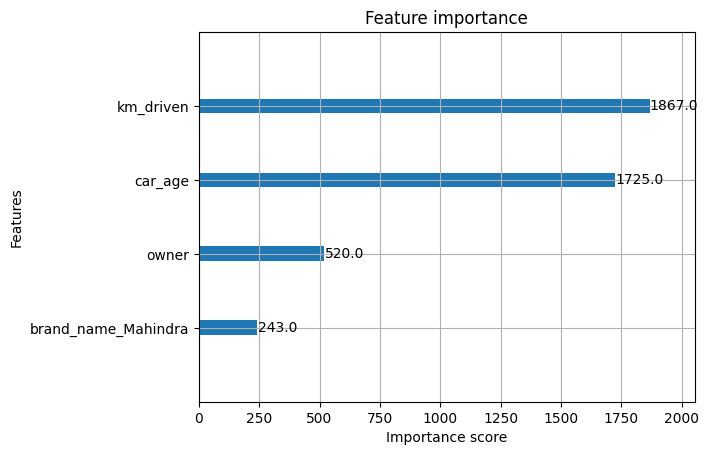

In [40]:
# Feature Importance Visualization for Variation 3
xgb.plot_importance(model_var3)
plt.show()

In [41]:
# Save the Visualization for Variation 3
xgb.plot_importance(model_var3)
plt.savefig(os.path.join(output_dir_visualization, 'fi_var3.png'))
plt.close()

print(f"Feature importance visualization saved to {os.path.join(output_dir_visualization, 'fi_var3.png')}")

Feature importance visualization saved to ../results/eda_visualizations/IT24103038_XGBoost/fi_var3.png


In [42]:
# Save Model Variation 3
model_path = os.path.join(output_dir, 'xgboost_var3_model.joblib')
joblib.dump(model_var3, model_path)
print(f"Variation 3 model saved to {model_path}")

Variation 3 model saved to ../results/outputs/IT24103038_XGBoost/xgboost_var3_model.joblib


## Model Performance Comparison
This section summarizes and compares the performance of all trained XGBoost models (baseline and variations) using R² and RMSE metrics on the test set. The results are displayed in a table, and the best model is identified based on the highest R² value. This helps in selecting the most accurate model for vehicle price prediction.

In [43]:
# Compare Model Performance
results = [
    ["Baseline", r2, rmse],
    ["Variation 1", r2_score(y_test, y_pred_var1), np.sqrt(mean_squared_error(y_test, y_pred_var1))],
    ["Variation 2", r2_score(y_test, y_pred_var2), np.sqrt(mean_squared_error(y_test, y_pred_var2))],
    ["Variation 3", r2_score(y_test, y_pred_var3), np.sqrt(mean_squared_error(y_test, y_pred_var3))],
]

results_df = pd.DataFrame(results, columns=["Model", "R2", "RMSE"])
display(results_df)

best_model = results_df.loc[results_df['R2'].idxmax()]
print(f"Best model: {best_model['Model']} (R2={best_model['R2']:.4f}, RMSE={best_model['RMSE']:.2f})")

,Model,R2,RMSE
0,Baseline,0.490317,172584.485714
1,Variation 1,0.449617,179342.915186
2,Variation 2,0.534848,164872.822864
3,Variation 3,0.368653,192081.698408


Best model: Variation 2 (R2=0.5348, RMSE=164872.82)
